# **Laboratorijska vježba 6**: Zadaci za samostalni rad

## **Predviđanje preživaljvanja u potopu Titanika**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži podatke o putnicima Titanika te informaciju jesu li preživjeli potop. Ovaj skup podataka jedan od najpopularnijih skupova na stranici Kaggle jer dobro služi za uvođenje u rješavanje problema klasifikacije. Skup podataka sadrži sljedeće značajke:

* name - naziv putnika
* sex - spol putnika
* dob - dob putnika
* sibsp - broj braće/sestara/supružnika putnika na brodu
* parch - broj roditelja/djece putnika na brodu
* ticket - broj karte putnika
* fare - cijena karte putnika
* cabin - broj kabine putnika
* embarked - luka ukrcaja putnika

te izlaznu varijablu:

* survived - informacija je li putnik preživio katastrofu ili ne.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

In [ ]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head(25)

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,Allen,Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S
1,Allison,Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S
0,Allison,Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S
0,Allison,Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S
0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S
1,Anderson,Mr. Harry,male,48.0000,0,0,19952,26.5500,E12,S
1,Andrews,Miss. Kornelia Theodosia,female,63.0000,1,0,13502,77.9583,D7,S
0,Andrews,Mr. Thomas Jr,male,39.0000,0,0,112050,0.0000,A36,S
1,Appleton,Mrs. Edward Dale (Charlotte Lamson),female,53.0000,2,0,11769,51.4792,C101,S
0,Artagaveytia,Mr. Ramon,male,71.0000,0,0,PC 17609,49.5042,NaN,C


## **Zadatak 1: Istraživanje skupa podataka**

Istražite skup podataka na način da izračunate deskriptivnu statistiku za izlaznu varijablu. Prokomentirajte koji je udio preživjelih u potonuću Titanika.

In [ ]:
titanic.rename(columns = {'survived':'last_name'}, inplace = True)

titanic.reset_index(inplace=True)
titanic = titanic.rename(columns = {'index':'survived'})
titanic.head(5)


,survived,last_name,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,Allen,Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S
1,1,Allison,Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S
2,0,Allison,Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S
3,0,Allison,Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S
4,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S


In [ ]:
titanic['survived'].describe()

#gledajući srednju vrijednost zaključujemo da je više preminulih nego preživjelih

count    1309.000000
mean        0.381971
std         0.486055
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: survived, dtype: float64

Nacrtajte dijagram raspršenosti između izlazne varijable i svakog pojedinog stupca u skupu podataka. Pomoć: možete koristiti matricu dijagrama raspršenosti iz biblioteke pandas.

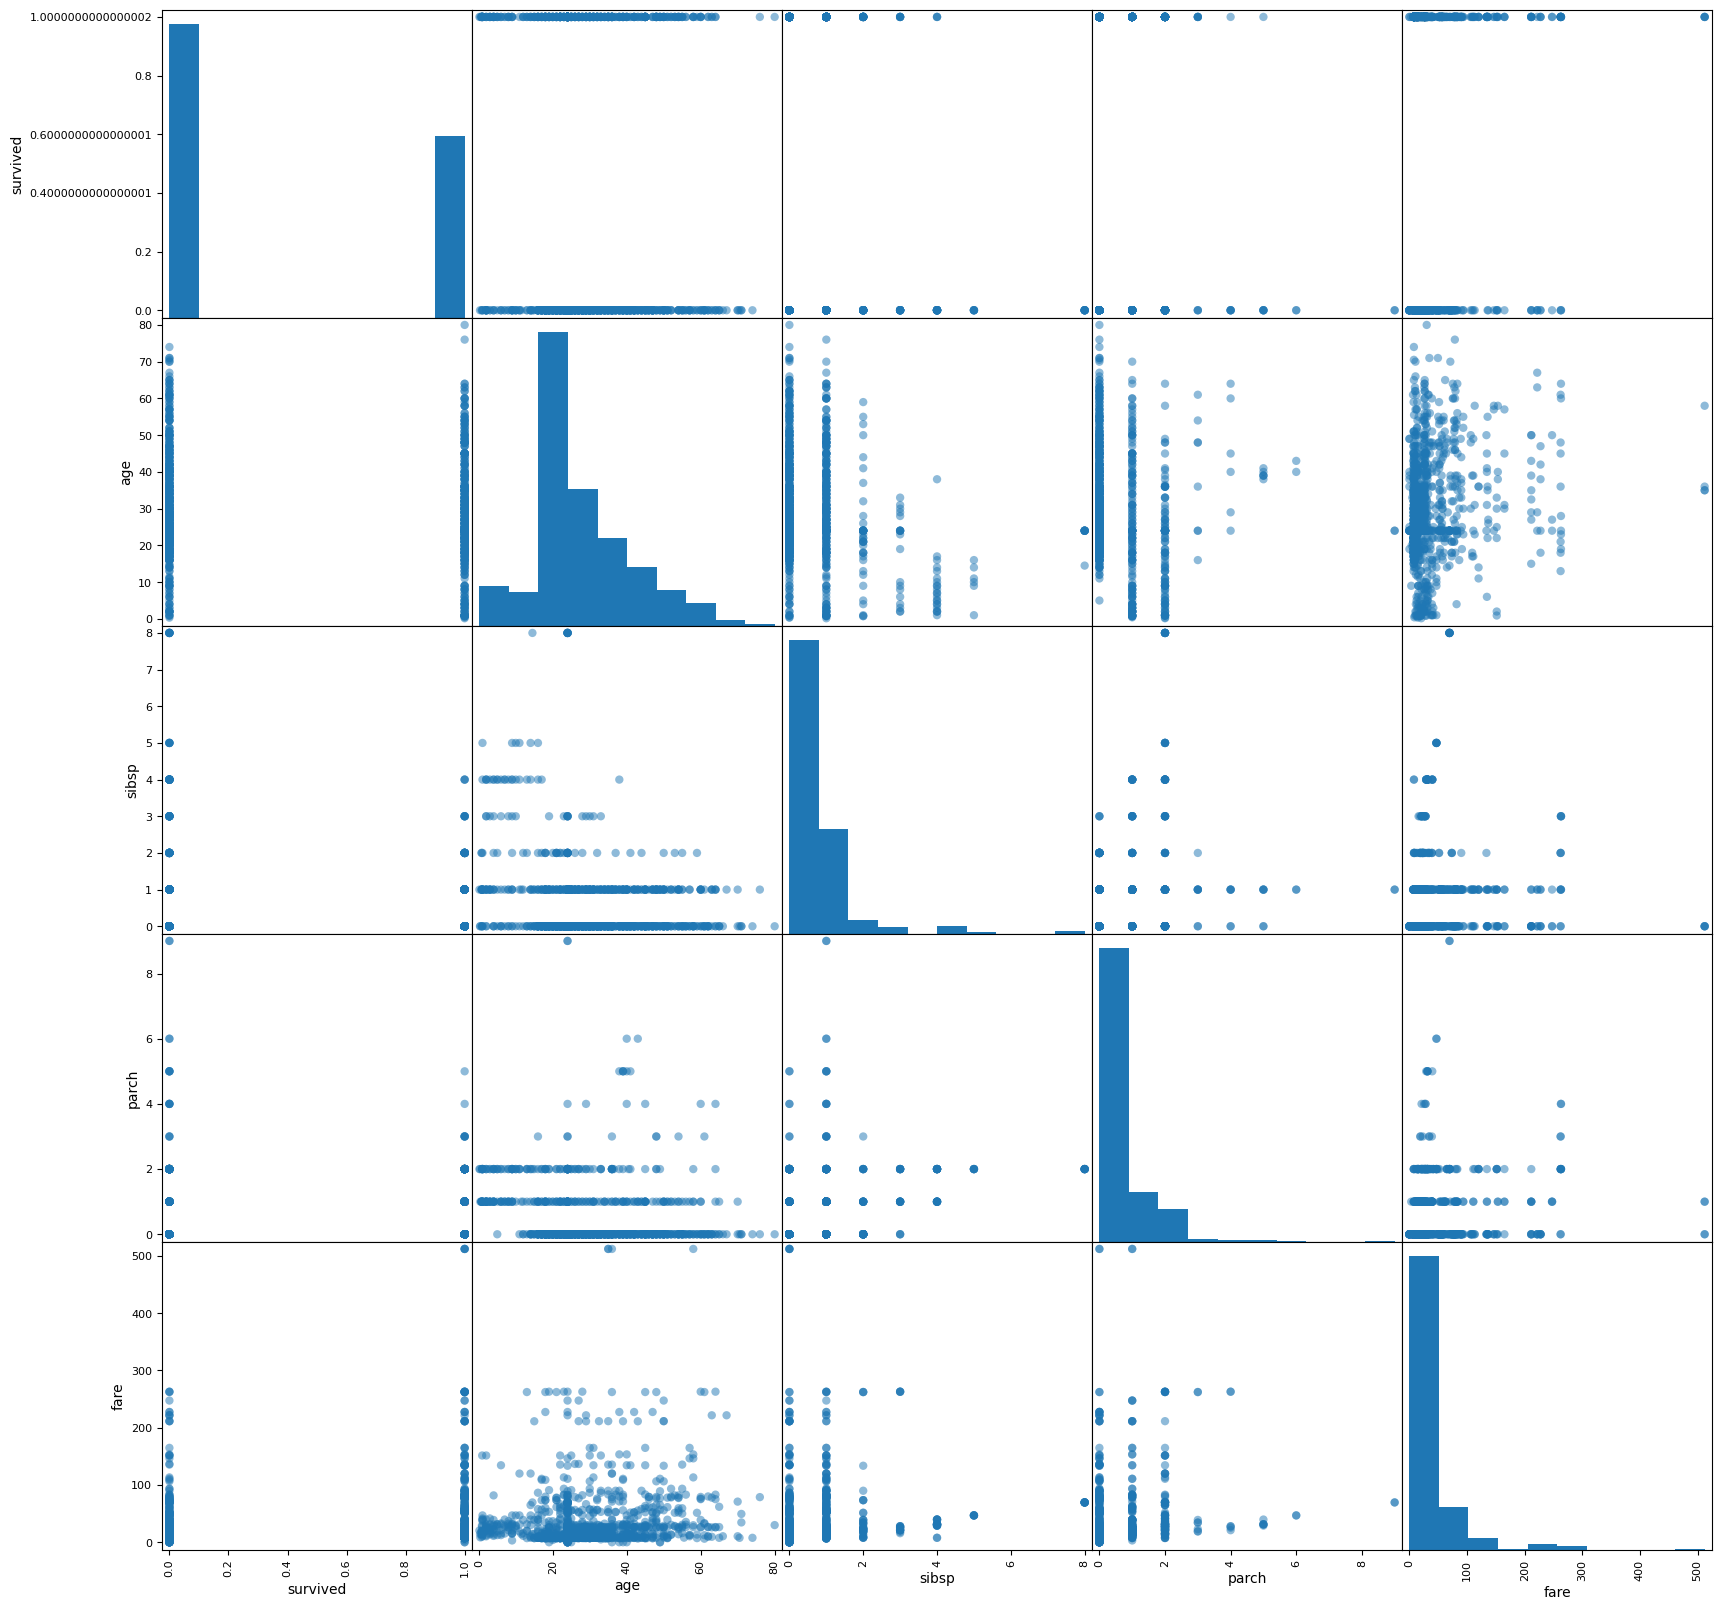

In [ ]:
pd.plotting.scatter_matrix(titanic,figsize=(20,20),grid=True, marker='o')
plt.show()

Odaberite značajke koje su po Vašem mišljenju bitne za klasifikaciju preživjelih i preminulih putnika. Kategoričke stupce pretvorite u numeričke pomoću *get_dummies()* funkcije iz biblioteke pandas. Provjerite ima li nedostajućih vrijednosti u nekom od stupaca te ih popunite na prikladan način (prosječna vrijednost, medijan, najčešća vrijednost,...). 

In [ ]:
titanic['age'].fillna(titanic['age'].mode()[0], inplace = True) 
sex=pd.get_dummies(titanic['sex'])
data=titanic[['age','sibsp','parch']]
data=pd.concat([data, sex], axis=1)
data=pd.concat([data, titanic['survived']], axis=1)
data.head(5)

,age,sibsp,parch,female,male,survived
0,29.0000,0,0,1,0,1
1,0.9167,1,2,0,1,1
2,2.0000,1,2,1,0,0
3,30.0000,1,2,0,1,0
4,25.0000,1,2,1,0,0


Zatim podijelite skup podataka na trening i test (u omjeru 70-30). Pripazite na to da u podskupovima za trening i test bude jednak **omjer** preživjelih i preminulih putnika.

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop(['survived'],axis=1)
y=data['survived']

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 1)


## **Zadatak 2: Logistička regresija**

Na podskupu za trening istrenirajte model algoritma logističke regresije. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test. 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression()
model.fit(X_train,y_train)

y_train_pr=model.predict(X_train)
y_test_pr=model.predict(X_test)

print("CAC train: ", accuracy_score(y_train,y_train_pr))
print("PR train: ", precision_score(y_train,y_train_pr))
print("RC train: ", recall_score(y_train,y_train_pr))
print("F1 train: ", f1_score(y_train,y_train_pr))
print()
print("CAC test: ", accuracy_score(y_test,y_test_pr))
print("PR test: ", precision_score(y_test,y_test_pr))
print("RC test: ", recall_score(y_test,y_test_pr))
print("F1 test: ", f1_score(y_test,y_test_pr))

CAC train:  0.7827510917030568
PR train:  0.7280966767371602
RC train:  0.6885714285714286
F1 train:  0.7077826725403819

CAC test:  0.7888040712468194
PR test:  0.7596899224806202
RC test:  0.6533333333333333
F1 test:  0.7025089605734767


Logistička regresija koristi prag vjerojatnosti kako bi odlučila u koju klasu treba svrstati primjerak. U nekim slučajevima, želimo razumjeti kako se model ponaša na različitim razinama ovog praga. Iscrtajte ROC krivulju na temelju stvarnih vrijednosti izlazne varijable i predviđenih vjerojatnosti oznaka klasa koje daje logistička regresija (*predict_proba*). Izračunajte površinu ispod krivulje, odnosno vrijednost mjere AUC. 

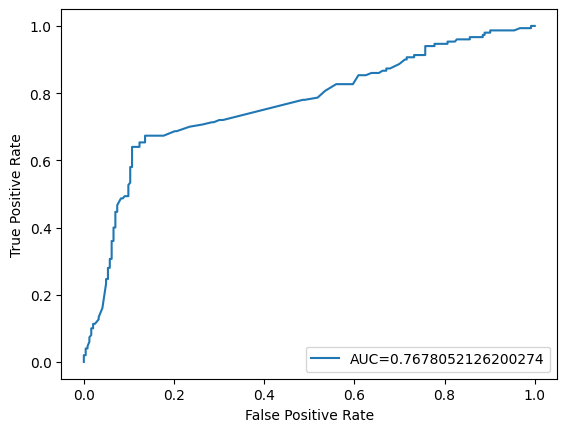

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = auc(fpr, tpr)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


## **Zadatak 3: Stroj potpornih vektora**

Na podskupu za trening istrenirajte model algoritma SVM s linearnom jezgrom. Ispišite jednadžbu granice između klasa te ju protumačite. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

modelSWM = SVC(kernel='linear')
modelSWM.fit(X_train,y_train)

feature_cols = data.columns[:-1]

for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(model.coef_[0][f], feature_cols[f]))
print(model.intercept_[0])

y_train_prSWM=modelSWM.predict(X_train)
y_test_prSWM=modelSWM.predict(X_test)

print()
print("CAC train: ", accuracy_score(y_train,y_train_prSWM))
print("PR train: ", precision_score(y_train,y_train_prSWM))
print("RC train: ", recall_score(y_train,y_train_prSWM))
print("F1 train: ", f1_score(y_train,y_train_prSWM))
print()
print("CAC test: ", accuracy_score(y_test,y_test_prSWM))
print("PR test: ", precision_score(y_test,y_test_prSWM))
print("RC test: ", recall_score(y_test,y_test_prSWM))
print("F1 test: ", f1_score(y_test,y_test_prSWM))

# iz jednadžbe pravca vidimo da spol ima najveći utjecaj od odabranih, zatim braća i sestre

-0.004742141578228385 * age + 
-0.25523131215007483 * sibsp + 
0.02020732629585262 * parch + 
1.2167813092614437 * female + 
-1.2170087275191543 * male + 
-0.004857059983734845

CAC train:  0.777292576419214
PR train:  0.7172619047619048
RC train:  0.6885714285714286
F1 train:  0.7026239067055394

CAC test:  0.7862595419847328
PR test:  0.7538461538461538
RC test:  0.6533333333333333
F1 test:  0.7


Istražite učinkovitost algoritma SVM s različitim jezgrama (polinomijalne s različitim stupnjem te radijalne funkcije). Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te usporedite rezultate u odnosu na rezultate dobivene s linearnom jezgrom.

In [ ]:
degrees=[2,3,4]
train_scores=[]
test_scores=[]


for degree in degrees:
  poly=SVC(kernel='poly',degree=degree)
  poly.fit(X_train, y_train)

  y_train_pr=poly.predict(X_train)
  y_test_pr=poly.predict(X_test)

  cac=accuracy_score(y_train,y_train_pr)
  train_scores.append(cac)
  print("CAC train: ", cac)
  print("PR train: ", precision_score(y_train,y_train_pr))
  print("RC train: ", recall_score(y_train,y_train_pr))
  print("F1 train: ", f1_score(y_train,y_train_pr))
  print()
  cac_test=accuracy_score(y_test,y_test_pr)
  test_scores.append(cac_test)
  print("CAC train: ", cac_test)
  print("PR test: ", precision_score(y_test,y_test_pr))
  print("RC test: ", recall_score(y_test,y_test_pr))
  print("F1 test: ", f1_score(y_test,y_test_pr))
  print("\n")      

  #u odnosu na linearnu točnost je manja, preciznost znatno veća, ali je odziv jako pao

CAC train:  0.6670305676855895
PR train:  0.8082191780821918
RC train:  0.16857142857142857
F1 train:  0.2789598108747045

CAC train:  0.6564885496183206
PR test:  0.8571428571428571
RC test:  0.12
F1 test:  0.21052631578947367


CAC train:  0.6790393013100436
PR train:  0.8043478260869565
RC train:  0.21142857142857144
F1 train:  0.334841628959276

CAC train:  0.6692111959287532
PR test:  0.8571428571428571
RC test:  0.16
F1 test:  0.2696629213483146


CAC train:  0.6735807860262009
PR train:  0.8072289156626506
RC train:  0.19142857142857142
F1 train:  0.30946882217090066

CAC train:  0.6615776081424937
PR test:  0.8695652173913043
RC test:  0.13333333333333333
F1 test:  0.23121387283236994




Istražite učinkovitost algoritma SVM sa složenijim jezgrama kada se pri njegovu treniranju koristi regularizacija. Isprobajte nekoliko vrijednosti za koeficijent regularizacije te prokomentirajte dobivene rezultate. 

## **Zadatak 4: Algoritam najbližih susjeda**

Na podskupu za trening istrenirajte algoritam KNN s različitim postavkama parametra $k$. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te prokomentirajte dobivene rezultate.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
train_scores=[]
test_scores=[]
k_values=[3,5,7]

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)

  y_train_prKNN=knn.predict(X_train)
  y_test_prKNN=knn.predict(X_test)

  cac=accuracy_score(y_train,y_train_prKNN)
  train_scores.append(cac)
  print("CAC train: ", cac)
  print("PR train: ", precision_score(y_train,y_train_prKNN))
  print("RC train: ", recall_score(y_train,y_train_prKNN))
  print("F1 train: ", f1_score(y_train,y_train_prKNN))
  print()
  cac_test=accuracy_score(y_test,y_test_prKNN)
  test_scores.append(cac_test)
  print("CAC train: ", cac_test)
  print("PR test: ", precision_score(y_test,y_test_prKNN))
  print("RC test: ", recall_score(y_test,y_test_prKNN))
  print("F1 test: ", f1_score(y_test,y_test_prKNN))
  print("\n")



#kako povecavamo broj susjeda, točnost se smanjuje za trening ali povecava za test, preciznost za test se znatno povecava, a odziv nema znatnu promjenu

CAC train:  0.8111353711790393
PR train:  0.7791798107255521
RC train:  0.7057142857142857
F1 train:  0.7406296851574212

CAC train:  0.6946564885496184
PR test:  0.6229508196721312
RC test:  0.5066666666666667
F1 test:  0.5588235294117647


CAC train:  0.8002183406113537
PR train:  0.7702265372168284
RC train:  0.68
F1 train:  0.7223065250379362

CAC train:  0.727735368956743
PR test:  0.6869565217391305
RC test:  0.5266666666666666
F1 test:  0.5962264150943396


CAC train:  0.7980349344978166
PR train:  0.7835051546391752
RC train:  0.6514285714285715
F1 train:  0.7113884555382215

CAC train:  0.7302798982188295
PR test:  0.7115384615384616
RC test:  0.49333333333333335
F1 test:  0.5826771653543308




Iscrtajte ovisnost mjere CAC o veličini susjedstva ($k$) za podskupove za trening i test. Koristite linijski dijagram.

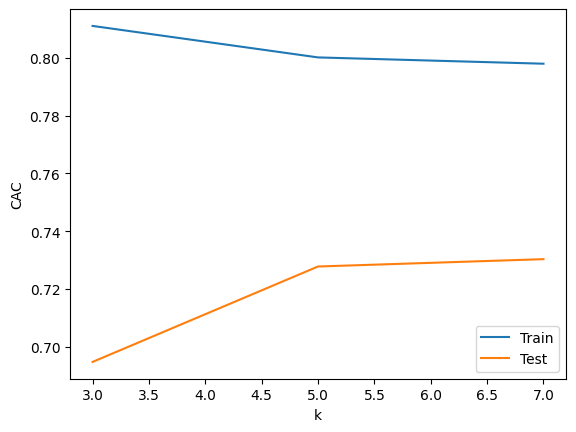

In [ ]:

plt.plot(k_values,train_scores,label='Train')
plt.plot(k_values,test_scores,label='Test')
plt.xlabel('k')
plt.ylabel('CAC')
plt.legend()
plt.show()



## **Zadatak 5: Stablo odluke**

Na podskupu za trening istrenirajte algoritam DT s različitim postavkama za dubinu stabla. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te prokomentirajte dobivene rezultate.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

depths = [2, 3, 4, 5]

train_scores = []
test_scores = []
    
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=1)
    dt.fit(X_train, y_train)
     
    y_train_dt=dt.predict(X_train)
    y_test_dt=dt.predict(X_test)

    cac=accuracy_score(y_train,y_train_dt)
    train_scores.append(cac)
    print("Depth: ",depth)
    print("CAC train: ", cac)
    print("PR train: ", precision_score(y_train,y_train_dt))
    print("RC train: ", recall_score(y_train,y_train_dt))
    print("F1 train: ", f1_score(y_train,y_train_dt))
    print()
    cac_test=accuracy_score(y_test,y_test_dt)
    test_scores.append(cac_test)
    print("CAC train: ", cac_test)
    print("PR test: ", precision_score(y_test,y_test_dt))
    print("RC test: ", recall_score(y_test,y_test_dt))
    print("F1 test: ", f1_score(y_test,y_test_dt))
    print("\n")


#uočavamo da točnost i preciznost rastu i na trening i test skupu s porastom dubine, a odziv se za trening skup ne mijenja, dok na test skupu opada
    

Depth:  2
CAC train:  0.7893013100436681
PR train:  0.7138964577656676
RC train:  0.7485714285714286
F1 train:  0.7308228730822872

CAC train:  0.7888040712468194
PR test:  0.7410071942446043
RC test:  0.6866666666666666
F1 test:  0.7128027681660899


Depth:  3
CAC train:  0.8133187772925764
PR train:  0.7594202898550725
RC train:  0.7485714285714286
F1 train:  0.753956834532374

CAC train:  0.7964376590330788
PR test:  0.7651515151515151
RC test:  0.6733333333333333
F1 test:  0.7163120567375887


Depth:  4
CAC train:  0.8133187772925764
PR train:  0.760932944606414
RC train:  0.7457142857142857
F1 train:  0.7532467532467533

CAC train:  0.7964376590330788
PR test:  0.7692307692307693
RC test:  0.6666666666666666
F1 test:  0.7142857142857142


Depth:  5
CAC train:  0.8155021834061136
PR train:  0.7623188405797101
RC train:  0.7514285714285714
F1 train:  0.7568345323741006

CAC train:  0.7964376590330788
PR test:  0.7651515151515151
RC test:  0.6733333333333333
F1 test:  0.7163120567375

Iscrtajte ovisnost mjere CAC o dubini stabla za podskupove za trening i test. Koristite linijski dijagram.

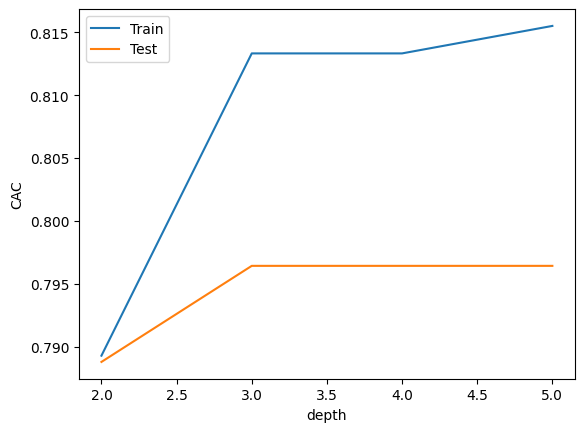

In [ ]:
plt.plot(depths,train_scores,label='Train')
plt.plot(depths,test_scores,label='Test')
plt.xlabel('depth')
plt.ylabel('CAC')
plt.legend()
plt.show()